## -READ the README to understand the data
It tells you the column order
readme.txt isn’t a table — it’s just plain text. so i cant use pandas read

In [2]:
with open('../data/CMAPSSData/readme.txt','r',encoding='latin1') as file:
    cont=file.read()
print(cont)

Data Set: FD001
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: ONE (HPC Degradation)

Data Set: FD002
Train trjectories: 260
Test trajectories: 259
Conditions: SIX 
Fault Modes: ONE (HPC Degradation)

Data Set: FD003
Train trjectories: 100
Test trajectories: 100
Conditions: ONE (Sea Level)
Fault Modes: TWO (HPC Degradation, Fan Degradation)

Data Set: FD004
Train trjectories: 248
Test trajectories: 249
Conditions: SIX 
Fault Modes: TWO (HPC Degradation, Fan Degradation)



Experimental Scenario

Data sets consists of multiple multivariate time series. Each data set is further divided into training and test subsets. Each time series is from a different engine  i.e., the data can be considered to be from a fleet of engines of the same type. Each engine starts with different degrees of initial wear and manufacturing variation which is unknown to the user. This wear and variation is considered normal, i.e., it is not considered a fault condition. Th

| File    | Used for                            |
| ------- | ----------------------------------- |
| `train` | Learn from full run-to-failure data |
| `test`  | Predict how long engines will last  |
| `RUL`   | Ground truth for evaluation         |

here i am not using 'RUL' because i am performing unsupervised learning

Encoding Types:
| Encoding                     | What It Does                                           | Good For                              |
| ---------------------------- | ------------------------------------------------------ | ------------------------------------- |
| **UTF-8**                    | Modern, universal, supports emoji, all languages       | Internet, Python default           |
| **Latin-1** (aka ISO-8859-1) | Old-school, supports Western European languages        | Older Windows files                |
| **cp1252**                   | Microsoft's fancy version of Latin-1 with curly quotes | MS Word files, PDFs, weird hyphens |


What Happened :
You opened a .txt file with encoding='utf-8'(default)

But the file was likely saved using Latin-1 or cp1252

So Python sees some bytes and goes “WTH is 0x96?!” 

In [3]:
import pandas as pd

file='../data/CMAPSSData/train_FD001.txt'

column_names = (
    ["engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"] +
    [f"sensor_{i}" for i in range(1, 27)]  
)

df=pd.read_csv(file,sep='\s+',header=None,names=column_names)

df.head()

<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\HP\AppData\Local\Temp\ipykernel_6100\337535694.py:10: SyntaxWarning: invalid escape sequence '\s'
  df=pd.read_csv(file,sep='\s+',header=None,names=column_names)


,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


lefts perform on FD001 first,

-Only one fault mode

-Only one environment

-Clean, no noise from different ops

-Perfect for: Clustering, DBSCAN, basic RUL

In [4]:
df.describe()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.0,20631.0,20631.000000,20631.000000,0.0,0.0,0.0,0.0,0.0
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,393.210654,2388.0,100.0,38.816271,23.289705,NaN,NaN,NaN,NaN,NaN
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,1.548763,0.0,0.0,0.180746,0.108251,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,388.000000,2388.0,100.0,38.140000,22.894200,NaN,NaN,NaN,NaN,NaN
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,392.000000,2388.0,100.0,38.700000,23.221800,NaN,NaN,NaN,NaN,NaN
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,393.000000,2388.0,100.0,38.830000,23.297900,NaN,NaN,NaN,NaN,NaN
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,394.000000,2388.0,100.0,38.950000,23.366800,NaN,NaN,NaN,NaN,NaN
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,400.000000,2388.0,100.0,39.430000,23.618400,NaN,NaN,NaN,NaN,NaN


In [5]:
df.isnull().sum().sort_values(ascending=False)

sensor_25       20631
sensor_24       20631
sensor_22       20631
sensor_26       20631
sensor_23       20631
cycle               0
engine_id           0
sensor_3            0
sensor_4            0
sensor_5            0
op_setting_1        0
op_setting_2        0
op_setting_3        0
sensor_1            0
sensor_2            0
sensor_10           0
sensor_9            0
sensor_8            0
sensor_7            0
sensor_6            0
sensor_11           0
sensor_13           0
sensor_12           0
sensor_18           0
sensor_17           0
sensor_16           0
sensor_15           0
sensor_14           0
sensor_21           0
sensor_19           0
sensor_20           0
dtype: int64

### Engine Lifespan Analysis

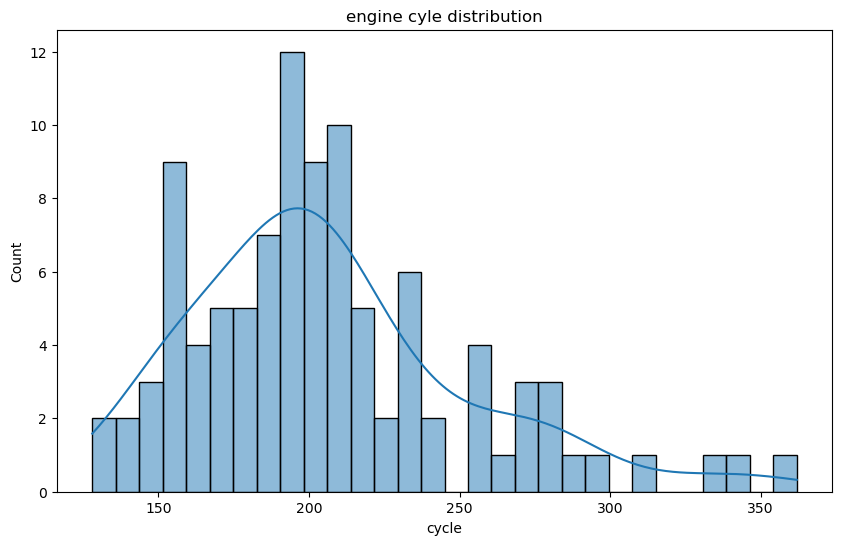

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

engine_cycles=df.groupby('engine_id')['cycle'].count()
plt.figure(figsize=(10,6))
sns.histplot(engine_cycles,kde=True,bins=30)
plt.title('engine cyle distribution')
plt.show()

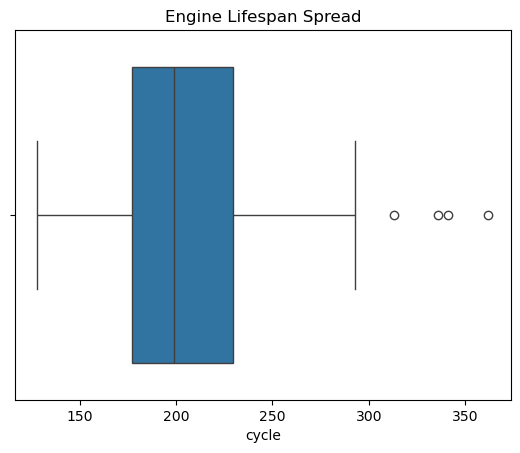

In [7]:
sns.boxplot(x=engine_cycles)
plt.title('Engine Lifespan Spread')
plt.show()



### Sensor Analysis

In [8]:
sensor_col=[i for i in df.columns if 'sensor_' in i]
low_var_sensors = [i for i in sensor_col if df[i].std() < 0.01]
print("\nLow-variance sensors :", low_var_sensors)


Low-variance sensors : ['sensor_1', 'sensor_5', 'sensor_6', 'sensor_10', 'sensor_16', 'sensor_18', 'sensor_19']


### Drop low-variance sensors and drop remaining null columns if any

In [9]:
df = df.drop(columns=low_var_sensors)
df.dropna(inplace=True,axis=1)

### Recheck sensor columns after drop and Correlation Heatmap

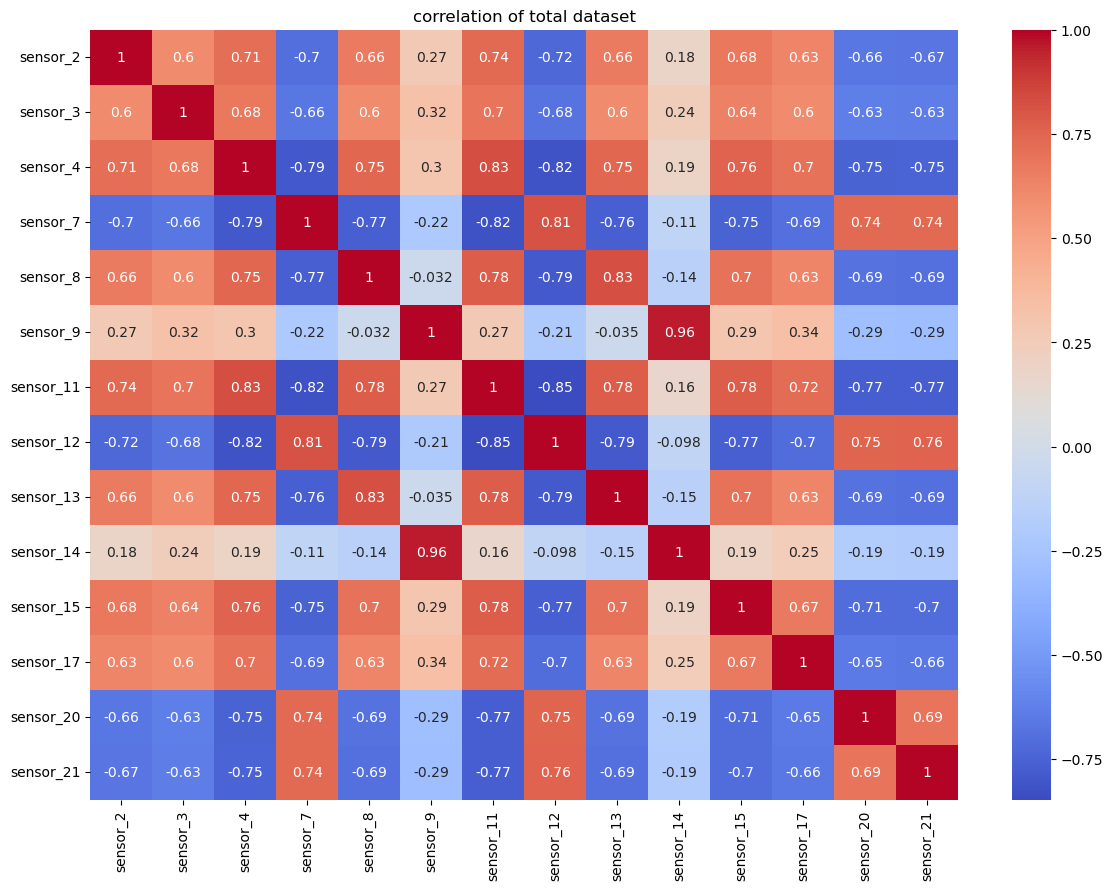

In [10]:
sensor_col=[i for i in df.columns if 'sensor_' in i]
plt.figure(figsize=(14,10))
sns.heatmap(df[sensor_col].corr(),annot=True,cmap='coolwarm')
plt.title('correlation of total dataset')
plt.show()

### Drop sensor_14 due to high correlation with sensor_9 and sensor_12

In [11]:
df.drop(columns='sensor_14',inplace=True)

### Final Correlation Heatmap

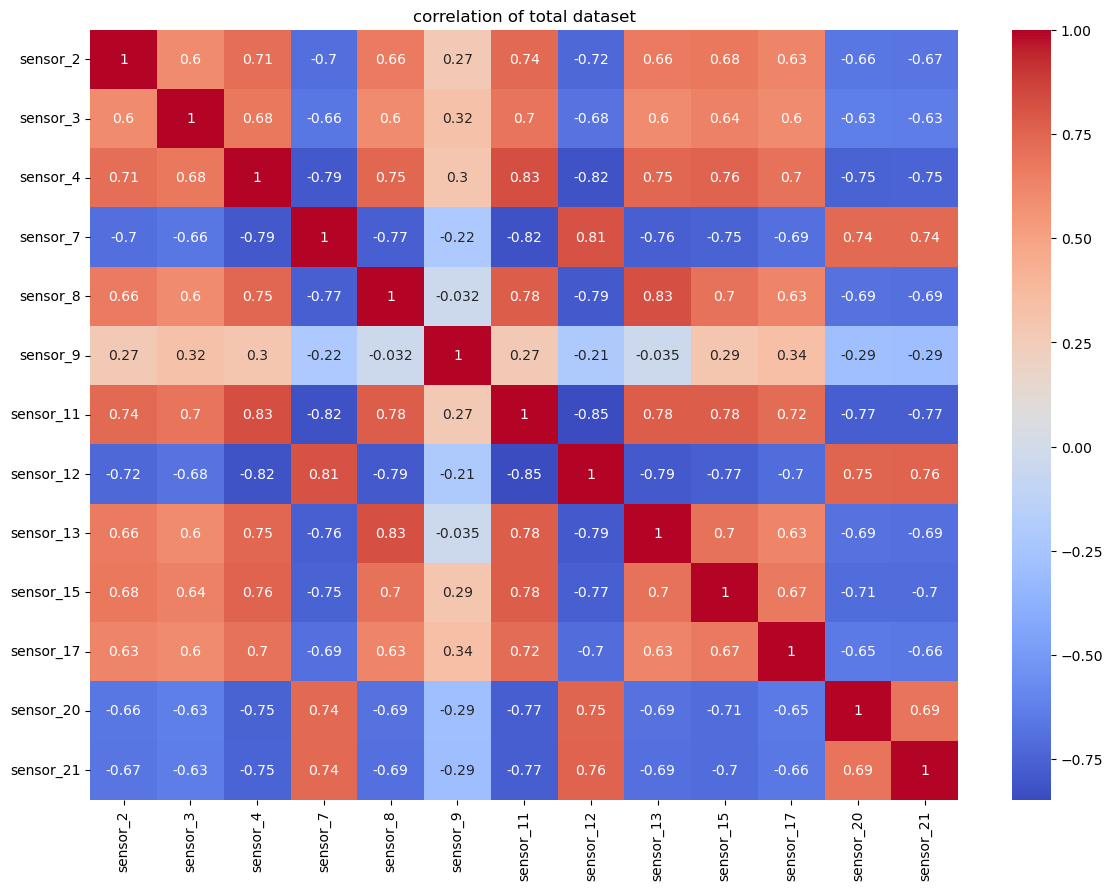

In [12]:

sensor_col=[i for i in df.columns if 'sensor_' in i]
plt.figure(figsize=(14,10))
sns.heatmap(df[sensor_col].corr(),annot=True,cmap='coolwarm')
plt.title('correlation of total dataset')
plt.show()

### Before diving deeper into modeling, let’s reduce the dimensionality using **PCA** and visualize the dataset in 2D. This helps us explore any natural **clusters or patterns** hidden within the sensor data.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


sensor_data=df[sensor_col]

scale=StandardScaler()
scaled_df=scale.fit_transform(sensor_data)

pca=PCA(n_components=2)
pca_res=pca.fit_transform(scaled_df)


In [14]:
from sklearn.cluster import DBSCAN

db=DBSCAN(eps=0.5, min_samples=10)
df['dbcluster']=db.fit_predict(pca_res)

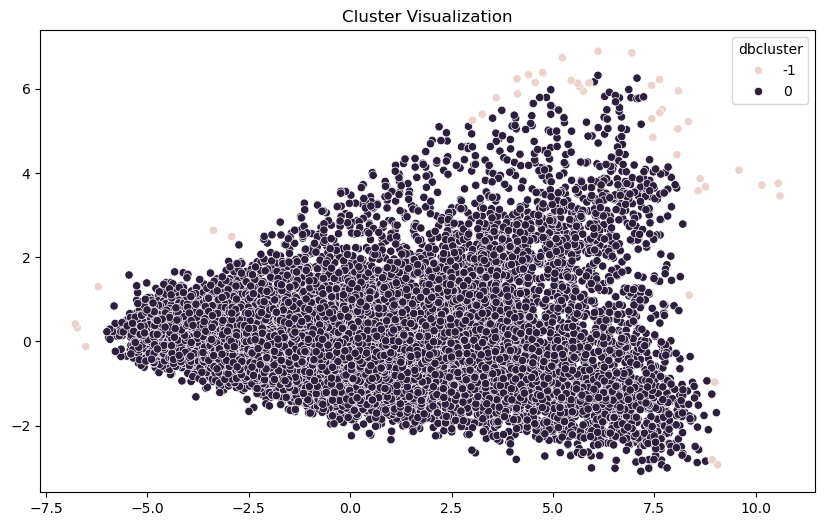

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df,x=pca_res[:,0],y=pca_res[:,1],hue='dbcluster')
plt.title("Cluster Visualization")
plt.show()


### Applied DBSCAN on PCA-reduced sensor data to identify potential clusters.  
Most data points were assigned to a single cluster, with a few outliers (`-1`), indicating **no clear density-based cluster separation** in PCA space.  
Lets train on original scaled data.

For training with Kmeans, lets find k

In [16]:
from sklearn.cluster import KMeans

inertia=[]
k=range(2,11)
for i in k:
    kmean=KMeans(n_clusters=i,random_state=33)
    kpred=kmean.fit_predict(scaled_df)
    inertia.append(kmean.inertia_)

Text(0.5, 1.0, 'Elbow Method')

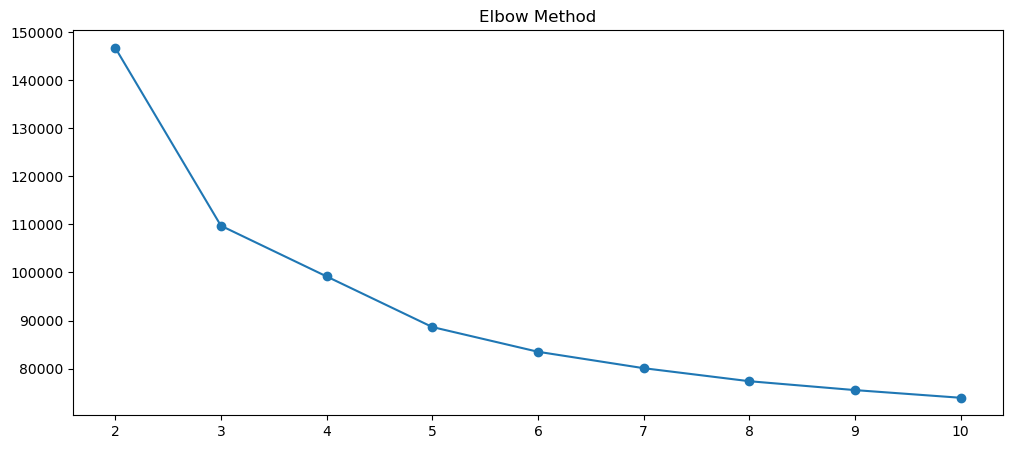

In [17]:
plt.figure(figsize=(12,5))
plt.plot(k,inertia,marker='o')
plt.title("Elbow Method")

In [18]:
fkmean=KMeans(n_clusters=5,random_state=235)
df['kmeans_cluster']=fkmean.fit_predict(scaled_df)

In [19]:
from sklearn.metrics import silhouette_score

print("KMeans Silhouette Score:", silhouette_score(scaled_df, df['kmeans_cluster']))


KMeans Silhouette Score: 0.20509867440863125


### shows poor cluster separation, clusters heavily overlap.
Current dataset (FD001) does not exhibit clear clustering patterns

### Since clustering didn't reveal strong patterns, lets focus on RUL prediction, which is more suitable for this dataset.

- compute the Remaining Useful Life for each engine cycle.

- Then, explore supervised models to predict RUL based on sensor readings.

In [21]:
import joblib 

joblib.dump(scale,'../models/scale.joblib')
df.to_csv('../data/cleaned.csv')